In [1]:
import pandas as pd

In [25]:
df1=pd.read_csv('./서울특별시_자치구별 이용자유형별 대중교통 이용건수_2024년_2.csv', encoding='utf-8')

In [26]:
df1.columns

Index(['연도', '구', '소계', '버스', '지하철', '택시'], dtype='object')

In [13]:
df2=pd.read_csv('./car_long.csv', encoding='utf-8')

In [14]:
df2.columns

Index(['district_id', 'district', 'year', 'car_count', 'car_diff'], dtype='object')

In [15]:
df2.head

<bound method NDFrame.head of      district_id district  year  car_count  car_diff
0              1      종로구  2020      50060       NaN
1              1      종로구  2021      50049     -11.0
2              1      종로구  2022      50832     783.0
3              1      종로구  2023      51000     168.0
4              1      종로구  2024      50482    -518.0
..           ...      ...   ...        ...       ...
145           25      강동구  2021     152003    6877.0
146           25      강동구  2022     151875    -128.0
147           25      강동구  2023     153678    1803.0
148           25      강동구  2024     154522     844.0
149           25      강동구  2025     167473   12951.0

[150 rows x 5 columns]>

In [17]:
df2 = df2[~df2['year'].isin([2020, 2025])]

In [18]:
df2

,district_id,district,year,car_count,car_diff
1,1,종로구,2021,50049,-11.0
2,1,종로구,2022,50832,783.0
3,1,종로구,2023,51000,168.0
4,1,종로구,2024,50482,-518.0
7,2,중구,2021,53107,1947.0
...,...,...,...,...,...
142,24,송파구,2024,244079,-1518.0
145,25,강동구,2021,152003,6877.0
146,25,강동구,2022,151875,-128.0
147,25,강동구,2023,153678,1803.0


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      100 non-null    int64 
 1   구       100 non-null    object
 2   소계      100 non-null    object
 3   버스      100 non-null    object
 4   지하철     100 non-null    object
 5   택시      100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [33]:
df1.columns

Index(['연도', '구', '소계', '버스', '지하철', '택시'], dtype='object')

In [41]:
df1.dtypes

연도      int64
구      object
소계      int64
버스      int64
지하철     int64
택시      int64
dtype: object

In [35]:
cols = ['소계', '버스', '지하철', '택시']

for c in cols:
    df1[c] = (
        df1[c]
        .str.replace(',', '', regex=False)
        .astype(int)
    )

In [39]:
df1.describe()

,연도,소계,버스,지하철,택시
count,100.00,100.00,100.00,100.00,100.00
mean,2022.50,134997412.58,59278241.14,66560936.53,9158234.91
std,1.12,52439313.39,17100364.79,36717932.00,5117461.86
min,2021.00,66752284.00,29859594.00,19830665.00,3556554.00
25%,2021.75,96055099.75,46170210.25,36366522.75,6202428.00
50%,2022.50,118954686.00,58450700.50,56552112.00,7909313.50
75%,2023.25,167148753.00,69437945.25,89981585.25,10891454.50
max,2024.00,322927844.00,111266706.00,179953430.00,31707708.00


In [38]:
pd.options.display.float_format = '{:.2f}'.format

In [45]:
df1[['연도', '버스', '지하철', '택시']].corr()

,연도,버스,지하철,택시
연도,1.00,0.20,0.17,-0.06
버스,0.20,1.00,0.55,0.53
지하철,0.17,0.55,1.00,0.78
택시,-0.06,0.53,0.78,1.00


In [51]:
plt.rcParams['font.family'] = 'Malgun Gothic'   # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 깨짐 방지

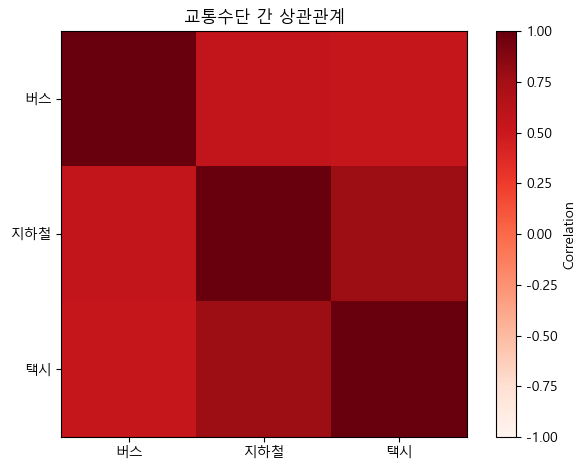

In [52]:
import matplotlib.pyplot as plt
import numpy as np

corr = df1[['버스','지하철','택시']].corr()

plt.imshow(corr, cmap='Reds', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')

plt.xticks(
    ticks=np.arange(len(corr.columns)),
    labels=corr.columns
)
plt.yticks(
    ticks=np.arange(len(corr.columns)),
    labels=corr.columns
)

plt.title('교통수단 간 상관관계')
plt.tight_layout()
plt.show()

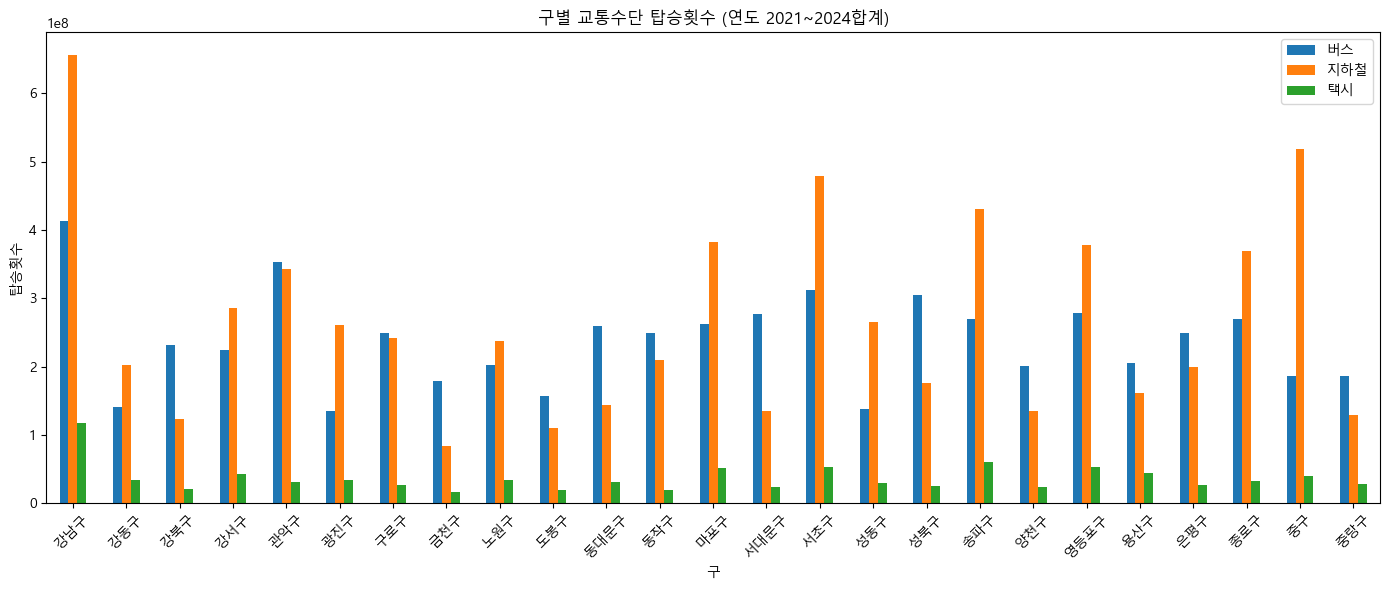

In [55]:

# 구별 합계
district_sum = (
    df1
    .groupby('구')[['버스', '지하철', '택시']]
    .sum()
)

# 막대그래프
district_sum.plot(kind='bar', figsize=(14,6))
plt.title('구별 교통수단 탑승횟수 (연도 2021~2024합계)')
plt.xlabel('구')
plt.ylabel('탑승횟수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
df2.to_csv('df2.csv', index=False, encoding='utf-8-sig')

In [57]:
df2.head()

,district_id,district,year,car_count,car_diff
1,1,종로구,2021,50049,-11.00
2,1,종로구,2022,50832,783.00
3,1,종로구,2023,51000,168.00
4,1,종로구,2024,50482,-518.00
7,2,중구,2021,53107,1947.00


In [58]:
df2.describe()

,district_id,year,car_count,car_diff
count,100.00,100.00,100.00,100.00
mean,13.00,2022.50,127183.23,624.43
std,7.25,1.12,50076.37,2070.99
min,1.00,2021.00,50049.00,-3984.00
25%,7.00,2021.75,95333.00,-478.25
50%,13.00,2022.50,118517.00,195.00
75%,19.00,2023.25,151636.50,1508.00
max,25.00,2024.00,256099.00,9965.00


In [60]:
df2.columns

Index(['district_id', 'district', 'year', 'car_count', 'car_diff'], dtype='object')

<Axes: xlabel='year'>

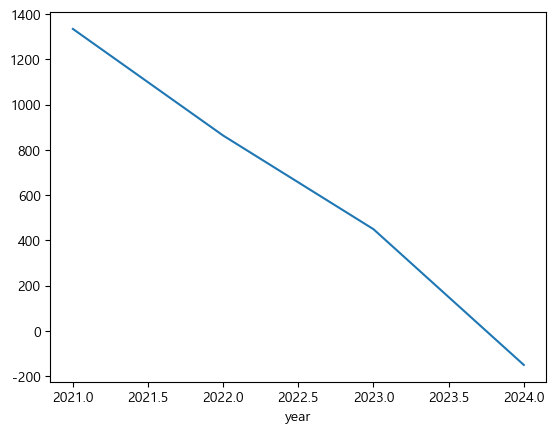

In [62]:
df2.groupby('year')['car_diff'].mean().plot()

In [63]:
df2.groupby('district')['car_diff'].mean().sort_values()

district
서초구    -1096.25
용산구     -620.00
강북구     -478.00
광진구     -388.50
관악구     -379.00
도봉구     -226.25
성동구     -222.25
노원구       -3.25
강서구       64.25
종로구      105.50
동작구      323.25
양천구      457.75
영등포구     475.25
성북구      738.25
송파구      776.25
중구       793.00
서대문구     903.25
마포구      908.00
구로구      979.25
중랑구     1114.50
금천구     1131.75
동대문구    1232.75
은평구     1446.00
강동구     2349.00
강남구     5226.25
Name: car_diff, dtype: float64

In [65]:
df2.groupby('year')['car_diff'].mean()

year
2021   1335.08
2022    863.56
2023    449.56
2024   -150.48
Name: car_diff, dtype: float64

In [ ]:
df2.groupby('year')['car_diff'].std()

# “서울 구별 자동차 증감은 2021년 이후 증가세가 지속적으로 둔화되었으며,
# 2023년에는 지역 간 변동성이 가장 크게 나타났고,
# 2024년에는 평균적으로 감소 전환과 함께 변동성도 완화되었다.”

year
2021   1895.40
2022   1884.89
2023   2560.26
2024   1657.95
Name: car_diff, dtype: float64

In [67]:
df1.to_csv('df1.csv', index=False, encoding='utf-8-sig')

In [69]:
df2 = df2.rename(columns={
    'district': '구',
    'year': '연도'
})

In [70]:
set(df1['구']) - set(df2['구'])
set(df2['구']) - set(df1['구'])

set()

In [72]:
df = pd.merge(
    df1,
    df2,
    on=['구', '연도'],
    how='inner'
)

In [79]:
df

,연도,구,소계,버스,지하철,택시,district_id,car_count,car_diff
0,2021,종로구,141759969,57821751,75771163,8167055,1,50049,-11.00
1,2021,중구,149856039,39190006,100938579,9727454,2,53107,1947.00
2,2021,용산구,87031985,43905878,32335411,10790696,3,79486,3005.00
3,2021,성동구,96087425,31552270,56470250,8064905,4,106435,905.00
4,2021,광진구,95731490,29859594,56633974,9237922,5,98658,-114.00
...,...,...,...,...,...,...,...,...,...
95,2024,관악구,191528043,91648849,92102308,7776886,21,117936,-950.00
96,2024,서초구,225955483,81739104,130172545,14043834,22,176628,491.00
97,2024,강남구,322927844,111266706,179953430,31707708,23,256099,5654.00
98,2024,송파구,208052956,71926631,120662352,15463973,24,244079,-1518.00


In [78]:
df[['버스','지하철','택시','car_diff']].corr()

,버스,지하철,택시,car_diff
버스,1.00,0.55,0.53,0.15
지하철,0.55,1.00,0.78,0.14
택시,0.53,0.78,1.00,0.33
car_diff,0.15,0.14,0.33,1.00


In [80]:
df = (
    df
    .rename(columns={
        'car_count': '자동차_대수',
        'car_diff': '자동차_증감'
    })
    .drop(columns=['district_id'])
)

In [82]:
df.to_csv('df.csv', index=False, encoding='utf-8-sig')

In [83]:
df

,연도,구,소계,버스,지하철,택시,자동차_대수,자동차_증감
0,2021,종로구,141759969,57821751,75771163,8167055,50049,-11.00
1,2021,중구,149856039,39190006,100938579,9727454,53107,1947.00
2,2021,용산구,87031985,43905878,32335411,10790696,79486,3005.00
3,2021,성동구,96087425,31552270,56470250,8064905,106435,905.00
4,2021,광진구,95731490,29859594,56633974,9237922,98658,-114.00
...,...,...,...,...,...,...,...,...
95,2024,관악구,191528043,91648849,92102308,7776886,117936,-950.00
96,2024,서초구,225955483,81739104,130172545,14043834,176628,491.00
97,2024,강남구,322927844,111266706,179953430,31707708,256099,5654.00
98,2024,송파구,208052956,71926631,120662352,15463973,244079,-1518.00


In [84]:
import statsmodels.api as sm

X = df[['버스', '지하철', '택시']]
y = df['자동차_증감']

In [91]:
X = sm.add_constant(X)

In [92]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 자동차_증감   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     5.740
Date:                Tue, 06 Jan 2026   Prob (F-statistic):            0.00118
Time:                        16:12:53   Log-Likelihood:                -896.72
No. Observations:                 100   AIC:                             1801.
Df Residuals:                      96   BIC:                             1812.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -453.7267    702.432     -0.646      0.5

In [95]:
year_dummies = pd.get_dummies(df['연도'], prefix='연도', drop_first=True)

In [101]:
import statsmodels.api as sm

X = df[['버스']]
y = df['자동차_증감']

X = sm.add_constant(X)
model_bus = sm.OLS(y, X).fit()
print(model_bus.summary())

                            OLS Regression Results                            
Dep. Variable:                 자동차_증감   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.257
Date:                Tue, 06 Jan 2026   Prob (F-statistic):              0.136
Time:                        16:18:57   Log-Likelihood:                -903.83
No. Observations:                 100   AIC:                             1812.
Df Residuals:                      98   BIC:                             1817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -452.7035    745.936     -0.607      0.5